<a href="https://colab.research.google.com/github/N-Linh/ML/blob/main/svm_non_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

non linear classification

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
X1 = np.linspace(-4, 4, 9).reshape(-1, 1)
X2 = np.c_[X1, X1**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

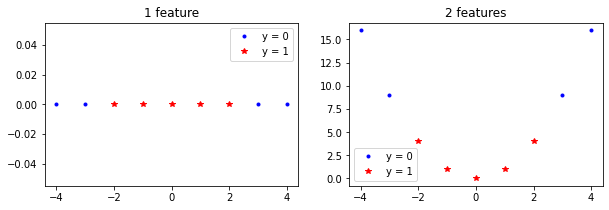

In [76]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(X1[(y==0)], np.zeros(len(X1[(y==0)])), "b.", label="y = 0")
plt.plot(X1[(y==1)], np.zeros(len(X1[(y==1)])), "r*", label="y = 1")
plt.legend()
plt.title("1 feature")

plt.subplot(122)
plt.plot(X2[(y==0), 0], X2[(y==0), 1], "b.", label="y = 0")
plt.plot(X2[(y==1), 0], X2[(y==1), 1], "r*", label="y = 1")
plt.legend()
plt.title("2 features")
plt.show()

In [77]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = "linear", C=float("inf"))
svm_clf.fit(X2, y)

SVC(C=inf, kernel='linear')

In [78]:
def plot_svm(svm_clf, xmin, xmax):
  #w0x0 + w1x1 + b = 0, x1 = -w0x0/w1 - b/w1
  x0 = np.linspace(xmin, xmax, 200)
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  decision_bound = -w[0]*x0/w[1] - b/w[1]
  margin = 1/w[1]
  mar_pos = decision_bound + margin
  mar_neg = decision_bound - margin
  plt.plot(x0, decision_bound, "k-", label="decision bound")
  plt.plot(x0, mar_pos, "k--")
  plt.plot(x0, mar_neg, "k--")

Text(0.5, 1.0, '2 features')

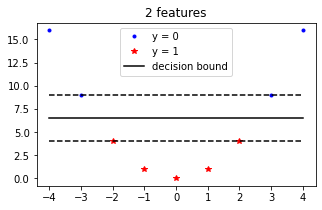

In [79]:
plt.figure(figsize=(5, 3))
plt.plot(X2[(y==0), 0], X2[(y==0), 1], "b.", label="y = 0")
plt.plot(X2[(y==1), 0], X2[(y==1), 1], "r*", label="y = 1")
plot_svm(svm_clf, -4, 4)
plt.legend()
plt.title("2 features")

using make_moons dataset

In [80]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X.shape, y.shape

((100, 2), (100,))

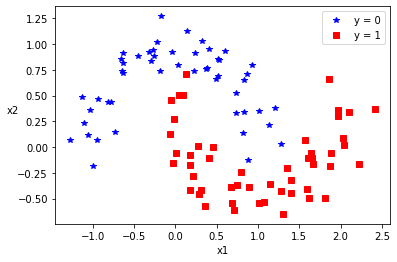

In [81]:
plt.plot(X[(y==0), 0], X[(y==0), 1], "b*", label="y = 0")
plt.plot(X[(y==1), 0], X[(y==1), 1], "rs", label="y = 1")
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.legend()

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
#before using linearSVC with regularization C, must scale features
svm_polynomial_clf = Pipeline([
      ("poly_features", PolynomialFeatures(degree=3)),
      ("scaler", StandardScaler()),
      ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])
svm_polynomial_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [83]:
x0_pre = np.linspace(-1.5, 2.5, 100)
x1_pre = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0_pre, x1_pre)
X_pre = np.c_[x0.ravel(), x1.ravel()]
y_pre = svm_polynomial_clf.predict(X_pre).reshape(x0.shape)
x0.shape, y_pre.shape

((100, 100), (100, 100))

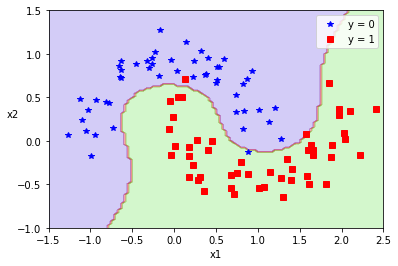

In [84]:
plt.contourf(x0, x1, y_pre, cmap=plt.cm.brg, alpha=0.2)
plt.plot(X[(y==0), 0], X[(y==0), 1], "b*", label="y = 0")
plt.plot(X[(y==1), 0], X[(y==1), 1], "rs", label="y = 1")
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.legend()

kernel trick, polynimial kernel

In [85]:
from sklearn.svm import SVC
svm_poly_kernel_clf = Pipeline([
      ("scaler", StandardScaler()),
      ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])#coef0 kiem soat muc do mo hinh bi anh huong boi da thuc bac cao, va da thuc bac thap.
svm_poly_kernel_clf.fit(X, y)
svm_poly100_kernel_clf = Pipeline([
      ("scaler", StandardScaler()),
      ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
svm_poly100_kernel_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [86]:
def plot_svm_poly_kernel(svm_clf, axes):
  x0_pre = np.linspace(axes[0], axes[1], 100)
  x1_pre = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0_pre, x1_pre)
  X_pre = np.c_[x0.ravel(), x1.ravel()]
  y_pre = svm_clf.predict(X_pre).reshape(x0.shape)
  plt.contourf(x0, x1, y_pre, cmap=plt.cm.brg, alpha=0.2, label="decision bound")
def plot_make_moons(X, y):
  plt.plot(X[(y==0), 0], X[(y==0), 1], "b*", label="y = 0")
  plt.plot(X[(y==1), 0], X[(y==1), 1], "rs", label="y = 1")
  plt.xlabel("x1")
  plt.ylabel("x2", rotation=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'label'
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'label'
  import sys


Text(0.5, 1.0, 'degree = 10, C = 5')

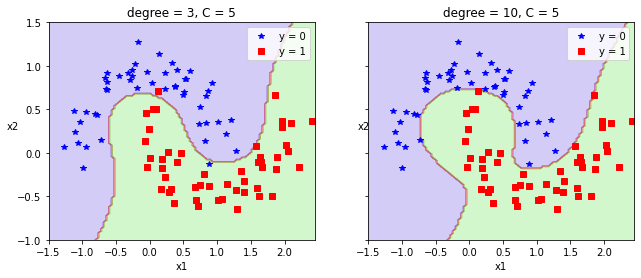

In [87]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_svm_poly_kernel(svm_poly_kernel_clf, [-1.5, 2.45, -1, 1.5])
plot_make_moons(X, y)
plt.legend()
plt.title("degree = 3, C = 5")

plt.sca(axes[1])
plot_svm_poly_kernel(svm_poly100_kernel_clf, [-1.5, 2.45, -1, 1.5])
plot_make_moons(X, y)
plt.legend()
plt.title("degree = 10, C = 5")

kernel gaussian rbf